Imports

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd
import numpy
from PIL import Image

In [2]:
trainDF = pd.read_excel('C:\\Users\\Sameed\\Desktop\\ML_Overall_Work\\Dataset\\Train.xlsx')

imagePaths = trainDF['Path'].tolist()
imageLabels = trainDF['Identity'].tolist()

labels_to_id = {"Unknown":0,"Sameed":1}
id_to_label = {0:"Unknown",1:"Sameed "}


In [3]:

array_of_features = []
coloumn_heading = []
for i in range(0,12288):
    coloumn_heading.append("x"+str(i)+"_Train")


for images in imagePaths:
    img = Image.open(images)
    # imgGray = img.convert('L')

    array_img = numpy.array(img)
    array_img = array_img.flatten()

    array_of_features.append(array_img)

# trainFeatures_df = pd.DataFrame(array_of_features,columns=coloumn_heading)
# print(trainFeatures_df)

In [4]:
labels_ID = []

for labels in imageLabels:
    labels_ID.append(labels_to_id[labels])

# trainLabels_df = pd.DataFrame(labels_ID,columns=['Y_train'])
# print(trainLabels_df)


In [5]:
testDF = pd.read_excel('C:\\Users\\Sameed\\Desktop\\ML_Overall_Work\\Dataset\\Test.xlsx')

imagePaths_test = testDF['Path'].tolist()
imageLabels_test = testDF['Identity'].tolist()


In [6]:

array_of_features_test = []
coloumn_heading_test = []

for i in range(0,12288):
    coloumn_heading_test.append("x"+str(i)+"_Test")


for images in imagePaths_test:
    img = Image.open(images)
    # imgGray = img.convert('L')

    array_img = numpy.array(img)
    array_img = array_img.flatten()

    array_of_features_test.append(array_img)

# testFeatures_df = pd.DataFrame(array_of_features_test,columns=coloumn_heading_test)
# print(testFeatures_df)

In [7]:
labels_ID_test = []

for labels in imageLabels_test:
    labels_ID_test.append(labels_to_id[labels])

# testLabels_df = pd.DataFrame(labels_ID_test,columns=['Y_test'])
# print(testLabels_df)


In [8]:

x_train = numpy.array(array_of_features)
y_train = numpy.array(labels_ID)

x_test = numpy.array(array_of_features_test)
y_test = numpy.array(labels_ID_test)



In [9]:
randomState_accr = []
randomState_pres = []
randomState_rcal = []
randomState_f1 = []
random_states = []

for i in range(0,43):
    clf = DecisionTreeClassifier(criterion='entropy',random_state=i)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)

    accr = clf.score(x_test,y_test)
    precision = precision_score(y_test, prediction)
    recall =  recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    
    random_states.append(i)
    randomState_accr.append(accr)
    randomState_pres.append(precision)
    randomState_rcal.append(recall)
    randomState_f1.append(f1)

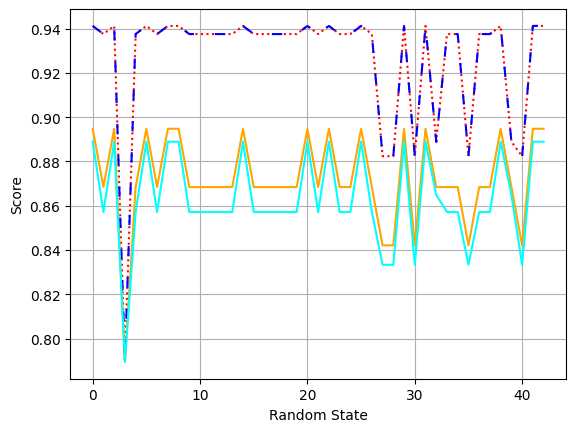

In [10]:
plt.plot(random_states,randomState_pres, c = "red", linestyle=":")
plt.plot(random_states,randomState_accr, c = "orange")
plt.plot(random_states,randomState_pres, c = "blue",linestyle= (0, (5, 10)))
plt.plot(random_states,randomState_f1, c = "cyan")

plt.xlabel("Random State")
plt.ylabel("Score")

plt.grid()
plt.show()

In [11]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=20)
clf.fit(x_train, y_train)
# clf.get_params()


DecisionTreeClassifier(criterion='entropy', random_state=20)

Testing

In [12]:
prediction = clf.predict(x_test)

print(f"Labels      Predicted")
print(f"------      ---------")

for (labels_test,labels_predict) in zip(y_test,prediction):
    print(f"{id_to_label[labels_test]}      {id_to_label[labels_predict]}")
print()


accr = clf.score(x_test,y_test)
precision = precision_score(y_test, prediction)
recall =  recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Accuracy: {:.2f}".format(accr))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Labels      Predicted
------      ---------
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Unknown      Unknown
Sameed       Sameed 
Sameed       Sameed 
Sameed       Unknown
Sameed       Sameed 
Unknown      Unknown
Unknown      Unknown
Sameed       Unknown
Unknown      Unknown
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Unknown      Unknown
Sameed       Unknown
Sameed       Sameed 
Unknown      Sameed 
Unknown      Unknown
Sameed       Sameed 
Unknown      Unknown
Sameed       Sameed 
Unknown      Unknown
Unknown      Unknown
Sameed       Sameed 
Unknown      Unknown
Unknown      Unknown
Sameed       Sameed 
Unknown      Unknown
Unknown      Unknown
Unknown      Unknown
Unknown      Unknown
Unknown      Unknown
Sameed       Sameed 
Unknown      Unknown
Unknown      Unknown

Accuracy: 0.89
Precision: 0.94
Recall: 0.84
F1 score: 0.89


In [1]:
# text_representation = tree.export_text(clf)
# print(text_representation)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=coloumn_heading,  class_names=["Unknown","Sameed"],filled=True)

NameError: name 'plt' is not defined